# Proyek Pertama Machine Learning Terapan - Sistem Rekomendasi
- **Nama:** Nabilah Wanara
- **Email:** 	mc006d5x211p@student.devacademy.id
- **ID Dicoding:** MC006D5X2119

# Import Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [4]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
movie = '/content/drive/MyDrive/ML Terapan 2/indonesian_movies.csv'
df = pd.read_csv(movie)
df

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97 min
1268,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116 min
1269,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150 min
1270,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",NaN


Diketahui bahwa data memiliki 1272 baris dan 11 kolom

# Data Understanding

In [6]:
# Ringkasan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB


Berdasarkan ringkasan informasi dataset, dapat disimpulkan bahwa dataset mengandung banyak nilai yang hilang serta terdapat ketidaksesuaian tipe data pada kolom votes.

In [7]:
# Statistik deskriptif dataset
df.describe(include="all")

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
count,1272,1272.000000,840,1236,376,1272.000000,1272,1272,1265,1272,869
unique,1262,NaN,840,15,11,NaN,312,8,377,1266,85
top,Arini,NaN,It tells the story of an Indonesian revolution...,Drama,13+,NaN,6,Indonesian,Nayato Fio Nuala,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",90 min
freq,2,NaN,1,456,161,NaN,58,1241,61,4,109
mean,NaN,2007.023585,NaN,NaN,NaN,6.144418,NaN,NaN,NaN,NaN,NaN
std,NaN,12.968560,NaN,NaN,NaN,1.389315,NaN,NaN,NaN,NaN,NaN
min,NaN,1926.000000,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2006.000000,NaN,NaN,NaN,5.300000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2011.000000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN


Insight :
- **Data tidak sempurna:** Banyak missing value pada beberapa kolom (description, genre, rating, directors, runtime).
- **Genre Drama dominan**
- **Distribusi tahun:** Data meliputi film dari 1926 hingga 2020 dengan mayoritas film modern.
- **Rata-rata rating pengguna cukup baik:** Mayoritas film mendapat rating pengguna di atas 6.
- **Mayoritas film berdurasi 90 menit:** Ini adalah durasi paling umum film Indonesia di dataset.
- **Sutradara dan aktor sangat bervariasi**

# Data Cleaning

In [8]:
# Cek nilai yang kosong
print(df.isnull().sum())

title             0
year              0
description     432
genre            36
rating          896
users_rating      0
votes             0
languages         0
directors         7
actors            0
runtime         403
dtype: int64


In [9]:
# Cek nilai duplikat
print(f'\njumlah duplikasi data : {df.duplicated().sum()}')


jumlah duplikasi data : 0


Dataset tidak mengandung data duplikat, namun memiliki sejumlah besar nilai yang hilang.

In [10]:
# Kategori genre pada dataset
print(f"Data unik di kolom genre : {df['genre'].unique()} total ada {df['genre'].nunique()}")

# Kategori rating pada dataset
print(f"\nData unik di kolom rating : {df['rating'].unique()} total ada {df['rating'].nunique()}")

Data unik di kolom genre : ['Biography' 'Thriller' 'Horror' 'Adventure' 'Drama' 'Comedy' 'Animation'
 'Action' 'History' 'Crime' 'Romance' 'Sci-Fi' 'Family' nan 'War'
 'Fantasy'] total ada 15

Data unik di kolom rating : ['13+' '17+' nan 'SU' 'TV-14' '21+' 'TV-MA' 'Not Rated' 'R' 'D' 'PG-13'
 'Unrated'] total ada 11


Meninjau setiap kategori dalam kolom kategorikal seperti genre dan rating untuk memperoleh pemahaman yang lebih baik sebelum melakukan penanganan terhadap nilai yang hilang.

In [11]:
# Mengisi nilai kosong di kolom deskripsi dengan 'unknown'
df['description'] = df['description'].fillna('Unknown')

# Mengisi nilai kosong di kolom genre dengan 'unknown'
df['genre'] = df['genre'].fillna('Unknown')

# Mengisi nilai kosong di kolom rating
df['rating'] = df['rating'].fillna("Unrated")

# Mengubah 11 kategori rating menjadi 5 kategori rating
df['rating'] = df['rating'].replace({
    "Not Rated": "Unrated",
    "PG-13": "13+",
    "TV-14": "13+",
    "TV-MA": "17+",
    "R": "17+",
    "D": "21+"
})

# Mengisi nilai kosong di kolom directors dengan 'unknown'
df['directors'] = df['directors'].fillna('unknown')

# Mengisi nilai kosong di kolom runtime dengan 'unknown'
df['runtime'] = df['runtime'].fillna('unknown')

* Kolom 'description', 'genre', 'directors', dan 'runtime' ditangani dengan mengisi nilai yang kosong menggunakan teks 'Unknown', guna menjaga agar data potensial tetap dipertahankan dan tidak terbuang.
* Kolom 'rating' disederhanakan dari 11 kategori menjadi hanya 5 kategori utama untuk memudahkan analisis, sementara film yang belum memiliki rating akan diberi label 'Unrated'.

In [12]:
# mengubah kolom votes menjadi integer setelah menghapus koma
df['votes'] = df['votes'].str.replace(',', '').astype(int)

Mengubah tipe data object pada kolom votes menjadi integer

In [13]:
# Cek informasi dataset setelah data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   1272 non-null   object 
 3   genre         1272 non-null   object 
 4   rating        1272 non-null   object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   int64  
 7   languages     1272 non-null   object 
 8   directors     1272 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       1272 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 109.4+ KB


# Exploratory Data Analysis (EDA)

## Univariate EDA

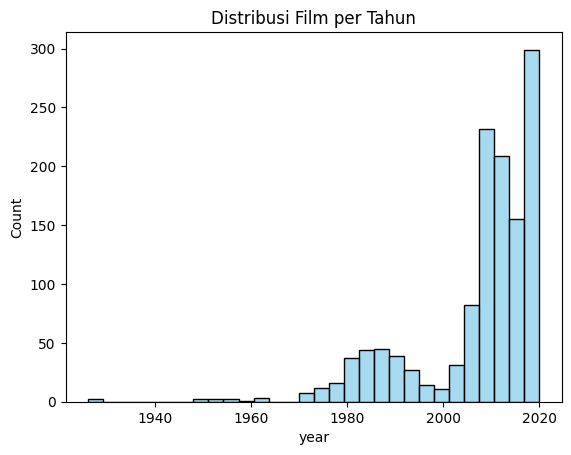

In [14]:
sns.histplot(df['year'], bins=30, color='skyblue')
plt.title('Distribusi Film per Tahun')
plt.show()

Visualisasi jumlah film yang dirilis setiap tahunnya memberikan gambaran tentang tren industri perfilman Indonesia, apakah sedang tumbuh, stagnan, atau menurun. Berdasarkan hasil plot, terlihat adanya lonjakan produksi film secara signifikan setelah tahun 2000, yang mengindikasikan kemajuan dan pertumbuhan positif dalam industri film nasional.

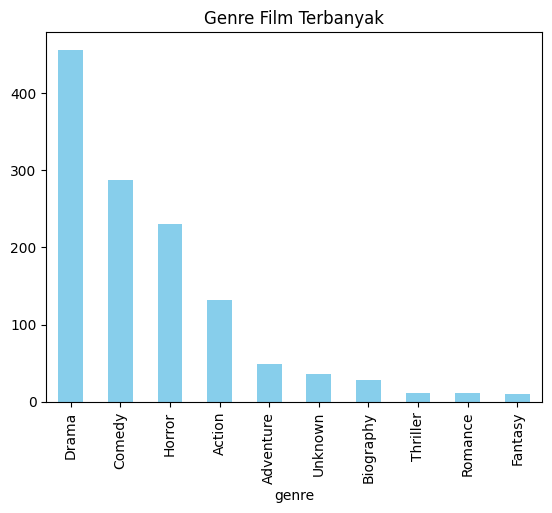

In [15]:
df['genre'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Genre Film Terbanyak')
plt.show()

Analisis ini mengidentifikasi genre yang paling umum atau paling sering diproduksi di industri film Indonesia. Dengan menghitung frekuensi kemunculan setiap genre, dapat diketahui genre-genre yang paling mendominasi dalam dataset. Hasil analisis menunjukkan bahwa genre seperti drama, komedi, dan horor merupakan genre yang paling populer dan banyak diproduksi.

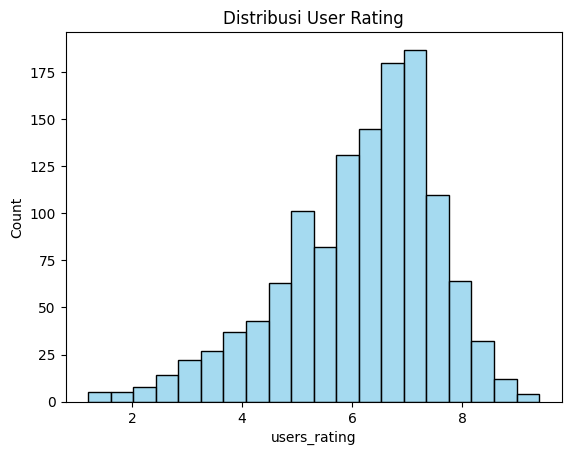

In [16]:
sns.histplot(df['users_rating'], bins=20, color='skyblue')
plt.title('Distribusi User Rating')
plt.show()

Distribusi ini memberikan gambaran mengenai bagaimana pengguna menilai film-film Indonesia. Dari sebaran nilai users_rating, terlihat bahwa sebagian besar film memperoleh rating antara 6 hingga 7. Pola ini tidak hanya mencerminkan persepsi umum penonton, tetapi juga berguna dalam menetapkan ambang batas (threshold) relevansi saat proses evaluasi dilakukan.

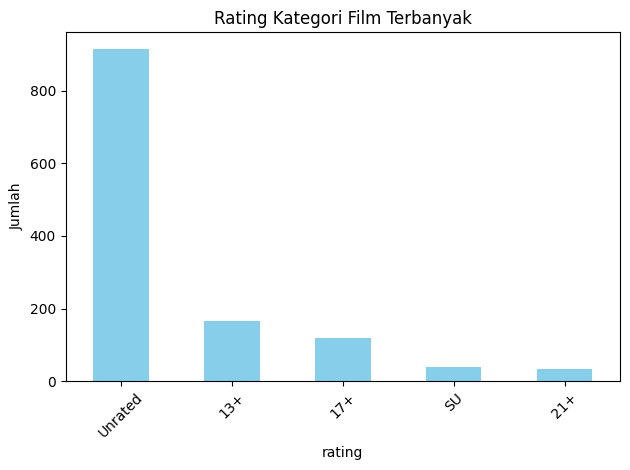

In [17]:
df['rating'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Rating Kategori Film Terbanyak')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Kategori rating mengacu pada klasifikasi umur atau konten (seperti SU, 13+, 17+, dsb). Analisis ini memeriksa bagaimana distribusi film berdasarkan kategori rating, yang penting untuk memastikan sistem rekomendasi tidak merekomendasikan film yang tidak sesuai dengan preferensi usia pengguna.

## Multivariate EDA

In [18]:
for genre in df["genre"].unique():
    data = df[df["genre"] == genre]
    print("Film populer dengan genre", genre, "=", data.sort_values("users_rating", ascending = False).head(1)["title"].values[0])

Film populer dengan genre Biography = Wage
Film populer dengan genre Thriller = Fiksi.
Film populer dengan genre Horror = Malam Jumat Kliwon
Film populer dengan genre Adventure = Anak Garuda
Film populer dengan genre Drama = Salisiah Adaik
Film populer dengan genre Comedy = Horas Amang: Tiga Bulan Untuk Selamanya
Film populer dengan genre Animation = November 10th
Film populer dengan genre Action = Merah Putih Memanggil
Film populer dengan genre History = Moonrise Over Egypt
Film populer dengan genre Crime = Leaf on a Pillow
Film populer dengan genre Romance = Turis Romantis
Film populer dengan genre Sci-Fi = Kurung Manuk (Bird Cage)
Film populer dengan genre Family = Lima Elang
Film populer dengan genre Unknown = Lupus
Film populer dengan genre War = Tropic of Emerald
Film populer dengan genre Fantasy = Loetoeng Kasaroeng


Analisis ini mengeksplorasi hubungan antara tingkat popularitas (user_rating) dan genre film, dengan tujuan mengidentifikasi genre yang cenderung menghasilkan film-film yang disukai oleh pengguna. Informasi ini berguna untuk menentukan genre-genre yang potensial dan layak menjadi fokus utama dalam pengembangan sistem rekomendasi.

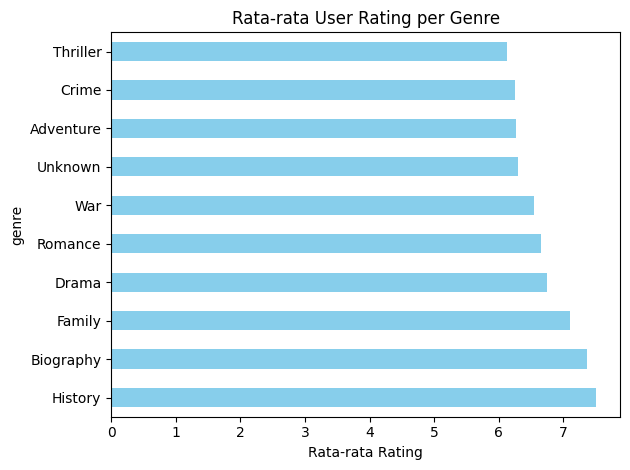

In [19]:
df.groupby('genre')['users_rating'].mean().sort_values(ascending=False).head(10).plot(kind='barh', color='skyblue')
plt.title('Rata-rata User Rating per Genre')
plt.xlabel('Rata-rata Rating')
plt.tight_layout()
plt.show()

Analisis ini bertujuan untuk mengidentifikasi genre dengan rata-rata penilaian pengguna tertinggi, di mana genre 'History' menempati posisi teratas. Genre-genre dengan rata-rata rating yang tinggi dapat dianggap memiliki kualitas konten yang unggul dan berpotensi tinggi untuk menarik minat penonton.

# Data Preparation

Menggabungkan kolom title, description, genre sebagai acuan untuk TF-IDF Vectorizer

In [20]:
# menggabungkan kolom title, description, genre
df['combined'] = df['title'] + ' ' + df['description'] + ' ' + df['genre']

In [21]:
# menggunakan teknik TF-IDF pada kolom yang digabungkan sebelumnya
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1272, 6263)

* TfidfVectorizer digunakan untuk mengubah kumpulan dokumen teks mentah menjadi representasi numerik berupa matriks fitur TF-IDF (Term Frequency–Inverse Document Frequency), yang mencerminkan pentingnya kata-kata dalam dokumen relatif terhadap seluruh korpus.

* Pengaturan parameter stop_words='english' menginstruksikan vektorizer untuk mengabaikan kata-kata umum dalam bahasa Inggris (seperti "the", "is", "and", "a", dll.). Kata-kata ini biasanya tidak memberikan informasi yang signifikan dan dapat mengaburkan makna sebenarnya dalam analisis teks. Dengan menghapusnya, model dapat lebih fokus pada kata-kata yang lebih bermakna dan informatif.

In [22]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# Melakukan normalisasi dengan Normalizer
normalizer = Normalizer()
tfidf_norm = normalizer.fit_transform(tfidf_matrix)

TF-IDF yang sudah dinormalisasi menggunakan Normalizer berfungsi untuk setiap baris dalam matriks ini sekarang mewakili dokumen, dan panjang vektor untuk setiap dokumen adalah 1.

# Model Development : Content based filtering

In [24]:
# membuat model menggunakan cosine similarity
similarity_cb = cosine_similarity(tfidf_norm)
similarity_cb

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.03508161, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03508161, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.03014689],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03014689,
        1.        ]])

Cosine similarity adalah metrik yang digunakan untuk mengukur kemiripan antara dua vektor non-nol dalam ruang produk skalar. Dalam konteks pengolahan bahasa alami (NLP).

* Bagaimana cara kerjanya?

Setiap dokumen diubah menjadi vektor dalam ruang berdimensi tinggi, dengan setiap dimensi mewakili kata unik. Cosine similarity digunakan untuk mengukur kemiripan antara dua vektor dengan menghitung kosinus sudut di antara keduanya. Nilai cosine similarity berada dalam rentang -1 hingga 1:

1: Menunjukkan bahwa kedua vektor (dokumen) sangat mirip atau identik, dengan sudut antara keduanya adalah 0 derajat.

0: Menunjukkan bahwa kedua vektor (dokumen) tidak terkait sama sekali atau saling tegak lurus, dengan sudut antara keduanya adalah 90 derajat.

-1: Menunjukkan bahwa kedua vektor (dokumen) sangat berlawanan, dengan sudut antara keduanya adalah 180 derajat.

**Karena vektor TF-IDF yang sudah dinormalisasi biasanya hanya memiliki nilai positif (atau nol), maka nilai cosine similarity-nya akan berkisar antara 0 dan 1.**

In [25]:
# Menyimpan nilai simalarity ke dalam dataframe
similarity_df = pd.DataFrame(similarity_cb, index=df['title'], columns=df['title'])

Menyimpan perhitungan cosine similarity ke dalam dataframe untuk melihat nilai kemiripan konten pada film

# Testing Model

In [26]:
def recommend_movies(title, n=10):
    if title not in similarity_df.columns:
        return f"Judul film '{title}' tidak ditemukan."

    similar_movies = similarity_df[title].sort_values(ascending=False)[1:n+1]
    return pd.DataFrame({
        'Rekomendasi': similar_movies.index,
        'Skor Similarity': similar_movies.values
    })

# Film yang mirip dilan
recommend_movies('Dilan 1991', 10)

,Rekomendasi,Skor Similarity
0,Milea,0.489681
1,Dilan 1990,0.424312
2,Kera Sakti,0.117860
3,Serigala Terakhir,0.106119
4,The Tarix Jabrix 3,0.085149
5,The Tarix Jabrix,0.082189
6,Misteri Janda Kembang,0.076466
7,Sweetheart,0.073403
8,Senior,0.067181
9,Marlina the Murderer in Four Acts,0.065813


Dari testing model untuk Rekomendasi film yang mirip dengan dilan 1991 yaitu ada Milea dan Dilan 1990 yang merupakan film yang memiliki keterkaitan dengan dilan 1991 dengan kemiripan 0.49 dan 0.42 , lalu selanjutnya ada Kera Sakti	 dengan skor similarity 0.12.

# Model Evaluation

In [27]:
# Menampilkan dataframe
similarity_df.head()

title,#FriendButMarried 2,4 Mantan,Aku Tahu Kapan Kamu Mati,Anak Garuda,Dignitate,Guru-Guru Gokil,Hunter in the Blue Side of Manchester,Janin,Mangkujiwo,Mariposa,...,Pedjuang,Asrama Dara,Tiga Dara,Tamu Agung,Lewat Djam Malam,The Tiger from Tjampa,Enam Djam di Djogja,Darah dan Doa,Resia Boroboedoer,Loetoeng Kasaroeng
title,,,,,,,,,,,,,,,,,,,,,
#FriendButMarried 2,1.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.024546,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4 Mantan,0.0,1.000000,0.035082,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Aku Tahu Kapan Kamu Mati,0.0,0.035082,1.000000,0.00000,0.00000,0.000000,0.000000,0.007786,0.016297,0.000000,...,0.0,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Anak Garuda,0.0,0.000000,0.000000,1.00000,0.01947,0.018243,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0667,0.0,0.000000,0.000000,0.000000,0.019352,0.051245,0.0
Dignitate,0.0,0.000000,0.000000,0.01947,1.00000,0.042979,0.000000,0.000000,0.000000,0.004258,...,0.0,0.008003,0.0000,0.0,0.035941,0.004604,0.005129,0.008169,0.000000,0.0


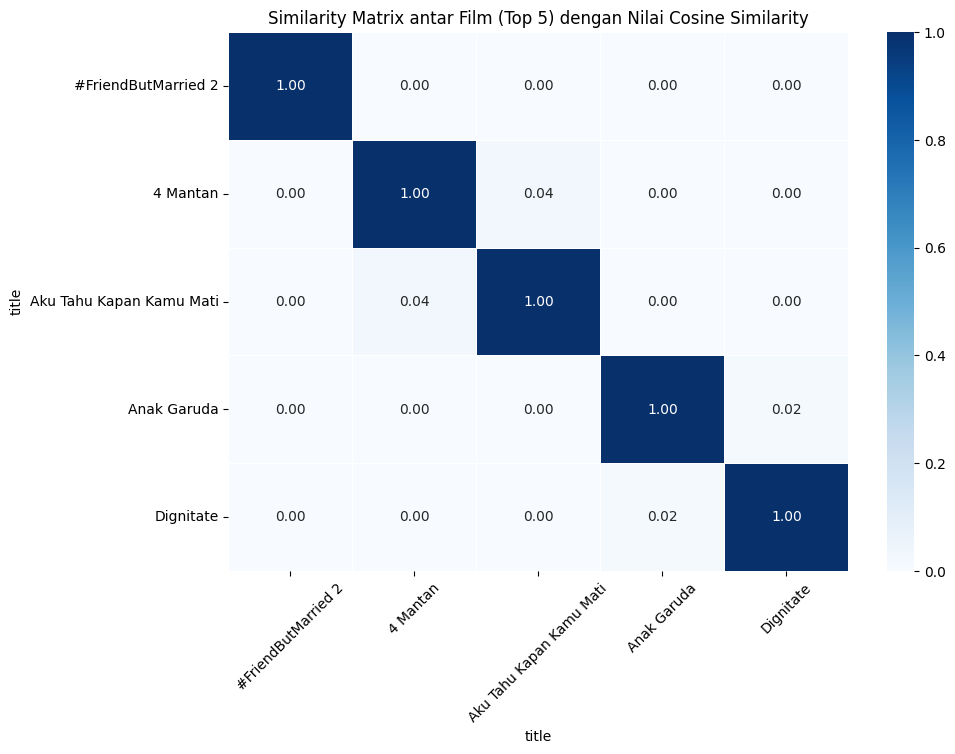

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(similarity_df.iloc[:5, :5],
            cmap='Blues',
            annot=True,
            fmt=".2f",
            linewidths=0.5)
plt.xticks(rotation=45)
plt.title("Similarity Matrix antar Film (Top 5) dengan Nilai Cosine Similarity")
plt.show()

Matriks similarity menunjukkan rendahnya kemiripan antar sebagian besar film berdasarkan konten teks TF-IDF (banyak nilai 0.00). Ini menyiratkan konten film yang sangat beragam/unik.

Namun, terdapat poin kemiripan menarik seperti "Aku tahu kapan kamu mati" dengan "4 Mantan" (0.04) yang menjadi kandidat utama untuk rekomendasi berbasis konten dan menunjukkan model berhasil menangkap koneksi khusus.

In [29]:
threshold = 6.0  # batasan rating >= 6 dianggap relevan

def get_top_k_recommendations(title, k=5):
    similar_movies = similarity_df[title].sort_values(ascending=False)[1:k+1]
    return similar_movies.index.tolist()

def precision_at_k(title, k=5, threshold=threshold):
    top_k = get_top_k_recommendations(title, k)

    # Hitung jumlah rekomendasi relevan (users_rating >= threshold)
    relevan = df[df['title'].isin(top_k)]
    relevan_count = (relevan['users_rating'] >= threshold).sum()

    precision = relevan_count / k
    return precision

In [30]:
film_sample = df['title'].sample(10, random_state=1)
precision_list = []

for film in film_sample:
    try:
        p = precision_at_k(film, k=5)
        precision_list.append(p)
    except:
        continue

average_precision = np.mean(precision_list)
print(f'Average Precision@5: {average_precision:.2f}')

Average Precision@5: 0.48


Rata-rata precision@5 sekitar 48% dari 5 rekomendasi teratas yang diberikan oleh sistem Anda 2 sampai 3 di antaranya adalah relevan bagi pengguna.

**Ini menunjukkan bahwa sistem rekomendasi memiliki kemampuan yang cukup bagus untuk mendapatkan rekomendasi film dengan genre, deskripsi, dan judul yang mirip**